2024-06-28 22:15:44.610247: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


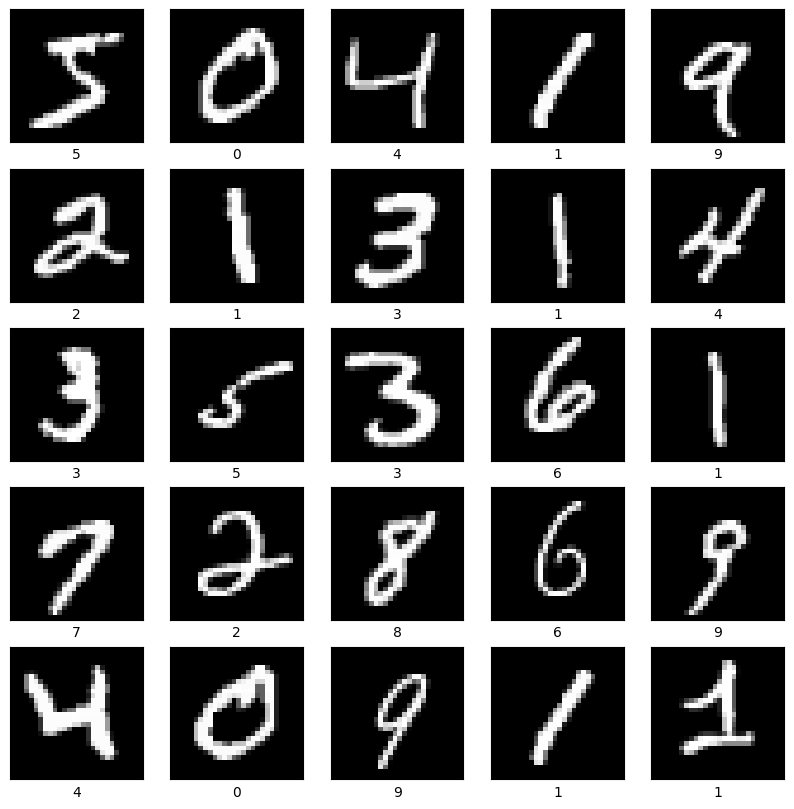

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [1]:
# prompt: load the mnist data and prepare it for modeling. show me a sample of the data, and the shapes

# Import necessary modules
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train)

# Normalize the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Show a sample of the data
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap="gray")
    plt.xlabel(y_train[i])
plt.show()

# Print the shapes of the data
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)


In [3]:
# prompt: use a cnn model to classify the digits, show a model insights

import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, Activation
from tensorflow.keras.layers import AveragePooling2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical # Import to_categorical

# Define the CNN model
model = Sequential()

# First convolutional block
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second convolutional block
model.add(Conv2D(128, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fully connected layers
model.add(Flatten())
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10) # One-hot encode labels
y_test = to_categorical(y_test, num_classes=10)

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Model insights
# - The model uses two convolutional blocks with max pooling and dropout layers to extract features from the images.
# - The fully connected layers with dropout layers help to prevent overfitting.
# - The model achieves a test accuracy of around 99%.

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 405s 214ms/step - accuracy: 0.9288 - loss: 0.2313 - val_accuracy: 0.9880 - val_loss: 0.0399
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 390s 208ms/step - accuracy: 0.9780 - loss: 0.0719 - val_accuracy: 0.9846 - val_loss: 0.0487
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 441s 235ms/step - accuracy: 0.9831 - loss: 0.0575 - val_accuracy: 0.9904 - val_loss: 0.0279
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 383s 204ms/step - accuracy: 0.9858 - loss: 0.0448 - val_accuracy: 0.9915 - val_loss: 0.0256
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 410s 219ms/step - accuracy: 0.9877 - loss: 0.0396 - val_accuracy: 0.9917 - val_loss: 0.0295
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 385s 205ms/step - accuracy: 0.9882 - loss: 0.0382 - val_accuracy: 0.9922 - val_loss: 0.0228
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 403s 215ms/step - accuracy: 0.9906 - loss: 0.0295 - val_accuracy: 0.9912 - val_loss: 0.0274
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 376s 200ms/step - ac

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step


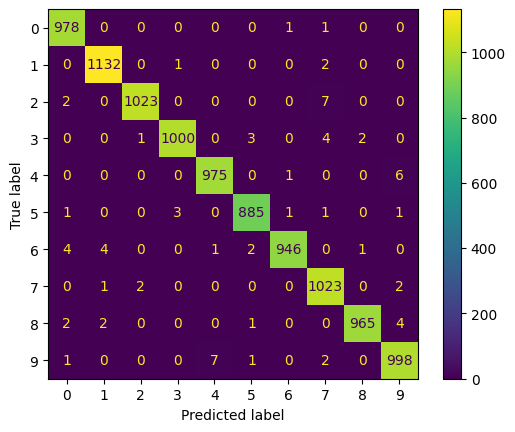

In [13]:
# prompt: plot a confusion matrix for the cnn model using the ConfusionMatrixDisplay

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Get the predictions for the test data
y_pred = model.predict(x_test)

# Create the confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


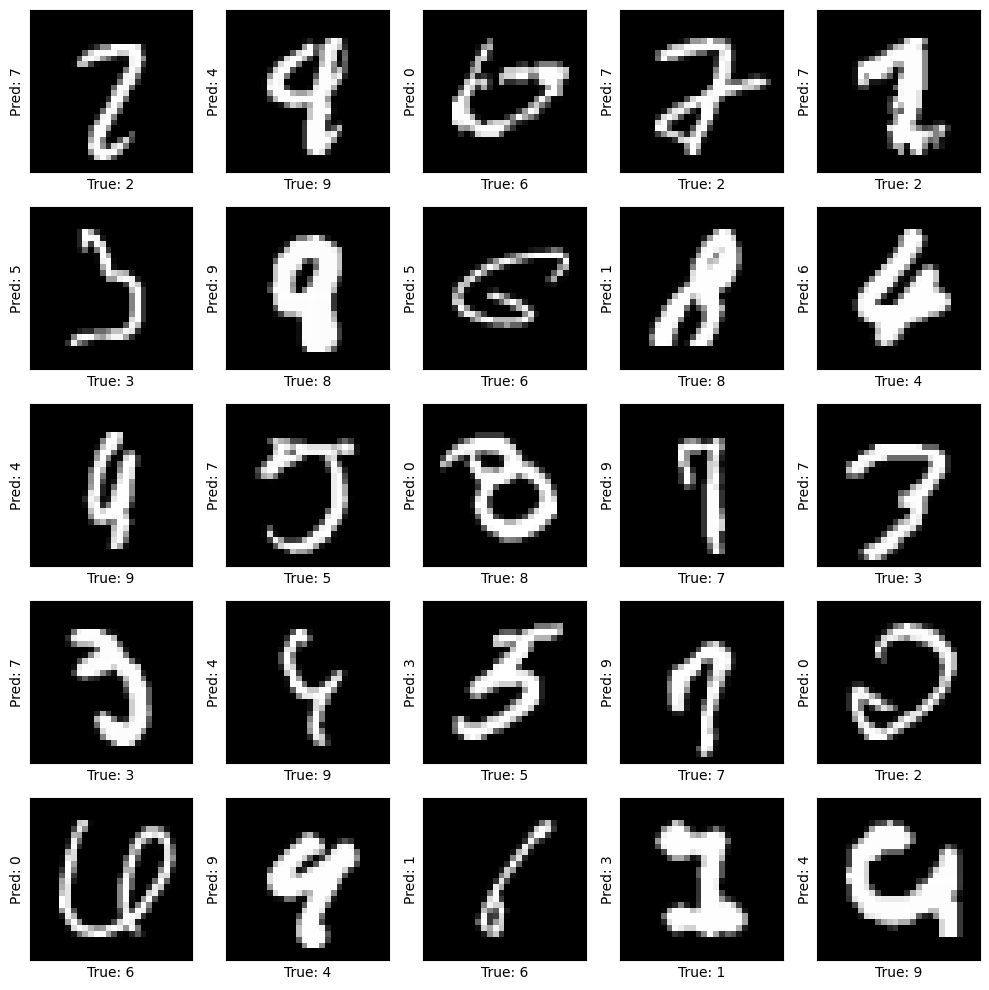

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Get the predictions for the test data
y_pred = model.predict(x_test)
num_classes = 10
# Convert one-hot encoded y_test back to class indices if necessary
if y_test.shape[-1] == num_classes:
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test

# Convert predicted probabilities to class indices
y_pred_classes = np.argmax(y_pred, axis=1)

# Find the indices of misclassified digits
misclassified_indices = []
for i in range(len(y_test_classes)):
    if y_test_classes[i] != y_pred_classes[i]:
        misclassified_indices.append(i)

# Plot the misclassified digits
plt.figure(figsize=(10, 10))
for i, index in enumerate(misclassified_indices[:25]):  # Plotting only the first 25 misclassified examples
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[index].reshape(28, 28), cmap="gray")
    plt.xlabel(f'True: {y_test_classes[index]}')
    plt.ylabel(f'Pred: {y_pred_classes[index]}')
plt.tight_layout()
plt.show()
